# Topic modeling 


In [1]:
import pandas as pd

The data is too big so we wont take all of it we will get first 36000 row 

In [2]:
data = pd.read_csv('articles1.csv')[:36000]

In [3]:
data.head(10)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [4]:
len(data)

36000

Remove nulls and duplicates 

In [5]:
content = data['content'].drop_duplicates().dropna()[:36000]

In [6]:
d = data["content"].drop_duplicates().dropna()[:36000]

In [7]:
len(content)

35955

In [8]:
len(d)

35955

In [8]:
d.to_frame() 
type(d)

pandas.core.series.Series

In [9]:
content.head()

0    WASHINGTON  —   Congressional Republicans have...
1    After the bullet shells get counted, the blood...
2    When Walt Disney’s “Bambi” opened in 1942, cri...
3    Death may be the great equalizer, but it isn’t...
4    SEOUL, South Korea  —   North Korea’s leader, ...
Name: content, dtype: object

In [10]:
type(content)

pandas.core.series.Series

# Visualize content 

This cell visualize the content[0] 'first row' before it preprocessed

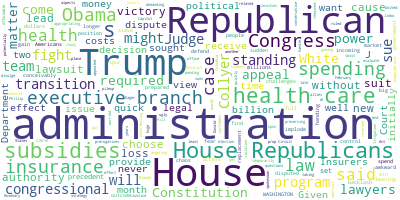

In [11]:
# Import the wordcloud library
from wordcloud import WordCloud
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(content[0])
# Visualize the word cloud
wordcloud.to_image()

## Data preprocessing

In [12]:
# from nltk.corpus import stopwords  # Text data
# from nltk.tokenize import sent_tokenize, word_tokenize
# stop_words = set(stopwords.words("english"))
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# import string

# def Preprocessing(data):
#     x = 0
#     content_list = []
#     for lines in data:        
# #         lines = lines.translate(str.maketrans('', '', string.punctuation))
#         words = word_tokenize(lines) # word tokenize
#         filtered_list = [word for word in words if word.casefold() not in stop_words]  # remove stopwords

#         lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_list]  # lemma the words

#         lines = ' '.join(lemmatized_words)
#         content_list.append(lines)
# #         x += 1
# #         if x > 1:
# #             break
#     content_df = pd.DataFrame(content_list, columns=["content"])

#     return content_df

In [13]:
# content_df = Preprocessing(content)
# content_df.head()
# # type(content_df)
# # ss = content_df.squeeze()
# # ss


"max_df" max probability of the apperance of one word
, "min_df" min probability of the apperance of one word
, "stop_words" remove the unnecessary word that could decrease the accuracy

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
data_cv = cv.fit_transform(content)

Note in old version of sklearn you can use "cv.get_feature_names" instade of "cv.get_feature_names_out"

In [11]:
len(cv.get_feature_names_out()) # unique words

81200

In [16]:
data_cv.toarray()

MemoryError: Unable to allocate 21.8 GiB for an array with shape (35955, 81200) and data type int64

In [12]:
import random
for i in range(10):
    random_word_id = random.randint(0,81199)
    print(cv.get_feature_names_out()[random_word_id])


034
israelites
reiterating
lindasuhler
discriminate
itsa_talia
zawistowki
rustics
pluralist
pais


In [13]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(data_cv)

LatentDirichletAllocation(n_components=7, random_state=42)

In [14]:
len(LDA.components_)

7

In [15]:
LDA.components_

array([[1.43213846e-01, 1.15113086e+03, 1.42858837e-01, ...,
        1.42857146e-01, 1.42857151e-01, 1.42857158e-01],
       [3.19078305e+01, 2.87485953e+03, 1.42870723e-01, ...,
        1.42895412e-01, 1.43272710e-01, 7.07540541e-01],
       [9.03610947e+00, 1.52381198e+03, 1.42893818e-01, ...,
        2.14244396e+00, 1.45732681e-01, 1.42857162e-01],
       ...,
       [4.36574182e+01, 9.12110075e+02, 1.42933039e-01, ...,
        1.43021510e-01, 4.13938325e+00, 9.49251108e-01],
       [1.28091969e+03, 8.62085291e+02, 1.42857145e-01, ...,
        1.42948632e-01, 1.42857148e-01, 1.42887097e-01],
       [2.80263127e+02, 8.23563552e+02, 1.55932736e-01, ...,
        1.42976191e-01, 1.43039914e-01, 1.42857164e-01]])

In [16]:
len(LDA.components_) , len(LDA.components_[0])

(7, 81200)

In [17]:
single_topic = LDA.components_[0]
single_topic.argsort()

array([48965, 71073, 55533, ..., 74203, 62789, 48242], dtype=int64)

In [18]:
single_topic.argsort()[-10:]

array([26771, 49682, 48260, 68724, 41573, 56500, 17496, 74203, 62789,
       48242], dtype=int64)

In [19]:
for index in single_topic.argsort()[-10:]:
    print(cv.get_feature_names_out()[index])

federal
new
ms
state
law
president
court
trump
said
mr


In [ ]:
# def vis(data):
    
#     print(type(data))
#     wordcloud = WordCloud(background_color="white", max_words=30, contour_width=3, contour_color='steelblue')
#     wordcloud.generate(data)
#     wordcloud.to_image()

In [ ]:
# data2 = []
# for index,topic in enumerate(LDA.components_):
#     data =[]

#     print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
#     for i in topic.argsort()[-15:]:
#         data.append(cv.get_feature_names()[i])
#     words = ' '.join(data)
#     data2.append(words)
# print(data2)

In [ ]:
# wordcloud = WordCloud(background_color="white", max_words=30, contour_width=3, contour_color='steelblue')
# wordcloud.generate(data2[0])
# wordcloud.to_image()

In [38]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['government', 'house', 'department', 'party', 'justice', 'federal', 'new', 'ms', 'state', 'law', 'president', 'court', 'trump', 'said', 'mr']


THE TOP 15 WORDS FOR TOPIC #1
['day', 'told', 'family', 'man', 'years', 'just', 'time', 'city', 'ms', 'like', 'new', 'people', 'mr', 'police', 'said']


THE TOP 15 WORDS FOR TOPIC #2
['students', 'police', 'border', 'group', 'social', 'reported', 'follow', '2016', 'media', 'people', 'texas', 'facebook', 'news', 'breitbart', 'twitter']


THE TOP 15 WORDS FOR TOPIC #3
['united', 'trump', 'government', 'company', 'years', '000', 'like', 'year', 'american', 'million', 'states', 'people', 'new', 'percent', 'said']


THE TOP 15 WORDS FOR TOPIC #4
['administration', 'officials', 'russian', 'government', 'islamic', 'obama', 'military', 'states', 'russia', 'state', 'security', 'united', 'president', 'trump', 'said']


THE TOP 15 WORDS FOR TOPIC #5
['just', 'think', 'going', '2016', 'republican', 'says', 'news', 'hillary', 

In [21]:
topic_results = LDA.transform(data_cv)

In [22]:
topic_results.shape

(35955, 7)

In [23]:
topic_results[0].round(2)

array([0.64, 0.  , 0.  , 0.36, 0.  , 0.  , 0.  ])

In [24]:
topic_results.argmax(axis=1)

array([0, 1, 1, ..., 6, 0, 6], dtype=int64)

In [25]:
Topics = topic_results.argmax(axis=1)
Topics
# d.head(10)
# d.to_frame() 

array([0, 1, 1, ..., 6, 0, 6], dtype=int64)

In [28]:
df = pd.DataFrame({'Content': d, 'Topic #': Topics})

In [29]:
df

,Content,Topic #
0,WASHINGTON — Congressional Republicans have...,0
1,"After the bullet shells get counted, the blood...",1
2,"When Walt Disney’s “Bambi” opened in 1942, cri...",1
3,"Death may be the great equalizer, but it isn’t...",1
4,"SEOUL, South Korea — North Korea’s leader, ...",4
...,...,...
35995,(CNN) Donald Trump and his advisers are defen...,5
35996,(CNN) Novak Djokovic crashed out of Wimbledon...,6
35997,(CNN) Mark Cavendish claimed the yellow jerse...,6
35998,(CNN) North Carolina’s controversial bathroom...,0


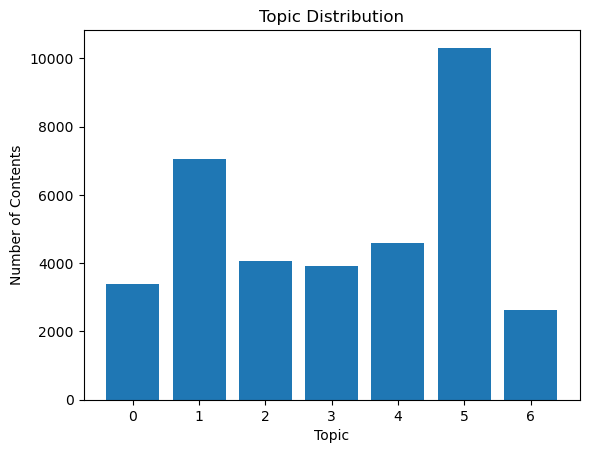

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# group the data by topic and count the number of occurrences
topic_counts = df.groupby('Topic #').count()['Content']

# create a bar chart of the topic distribution
plt.bar(topic_counts.index, topic_counts.values)
plt.xlabel('Topic')
plt.ylabel('Number of Contents')
plt.title('Topic Distribution')
plt.show()